## Data Acquistion 

In [7]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv('traffic.csv')

In [9]:
data.head()

,event,date,country,city,artist,album,track,isrc,linkid
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2
3,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd
4,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8


In [10]:
data.isnull().sum()

event         0
date          0
country      11
city         11
artist       37
album         5
track         5
isrc       7121
linkid        0
dtype: int64

In [11]:
data.describe()

,event,date,country,city,artist,album,track,isrc,linkid
count,226278,226278,226267,226267,226241,226273,226273,219157,226278
unique,3,7,211,11993,2419,3254,3562,709,3839
top,pageview,2021-08-19,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
freq,142015,35361,47334,22791,40841,40841,40841,40841,40841


## **1. Total and Daily Pageview Events**

In [12]:
data['event'].count()

226278

In [13]:
data['event'].unique()

array(['click', 'preview', 'pageview'], dtype=object)

### **How many total pageview events did the links in the dataset receive during the entire period?**

In [14]:
pageview_count = data['event'].value_counts()['pageview']
print(pageview_count)

142015


### **What is the average number of pageview events per day?**

In [15]:
data.sample(4)

,event,date,country,city,artist,album,track,isrc,linkid
33827,click,2021-08-22,United States,Chicago,Luci4,Kurxxed Emeraldz,Kurxxed Emeraldz,USAT22103307,6a664635-961f-4a51-9451-d5d95c3e5861
69114,preview,2021-08-25,Germany,Marktredwitz,Olivia Rodrigo,SOUR,good 4 u,USUG12101245,a4a6c5d9-eb71-4987-9e37-762aa9fc740b
80949,preview,2021-08-23,India,Mumbai,Tundra Beats,Beautiful Day,Beautiful Day,QZHN92194591,e849515b-929d-44c8-a505-e7622f1827e9
140140,pageview,2021-08-20,Netherlands,Stad aan 't Haringvliet,"DMNDS, Strange Fruits Music, Fallen Roses, Luj...",Calabria (feat. Lujavo & Nito-Onna),Calabria (feat. Lujavo & Nito-Onna),GBSMU9833211,681d888a-59ce-4acb-b7c5-95dab0c063d9


In [16]:
# Group by date and count pageview events
pageview_by_date = data[data['event'] == 'pageview'].groupby('date')['event'].count()

# Calculate the average
average_pageviews_per_day = pageview_by_date.mean()

print(f"Average pageview events per day: {average_pageviews_per_day}")


Average pageview events per day: 20287.85714285714


## **2. Analysis of Other Events**

### **What is the total count and distribution of other recorded events in the dataset**

In [17]:
# Get the count of each event type
event_counts = data['event'].value_counts()
print('Total Event Counts',event_counts)
print()

# Calculate the distribution of each event
event_distribution = event_counts / len(data) * 100
print('Event Distribtions :',event_distribution)

Total Event Counts pageview    142015
click        55732
preview      28531
Name: event, dtype: int64

Event Distribtions : pageview    62.761294
click       24.629880
preview     12.608826
Name: event, dtype: float64


## **3. Geographical Distribution**

### **Which Countries contributed to the pageviews?**

In [18]:
data.sample(5)

,event,date,country,city,artist,album,track,isrc,linkid
71605,preview,2021-08-20,United Arab Emirates,Dubai,Groove Delight,San Andreas,San Andreas - Radio Edit,ES71G1633735,5df02edc-daea-47f0-ac73-0ca9441dfae9
190685,pageview,2021-08-22,India,Mysore,"Thaman S, Armaan Malik, Shreya Ghoshal",Yuvarathnaa (Kannada) (Original Motion Picture...,Neenaade Naa,IND292000868,a82495d3-5a38-4010-894f-c64fa3b9c6ef
198565,pageview,2021-08-25,Australia,Sydney,"50 Cent, Olivia",The Massacre,Candy Shop,USIR10500072,97105aff-3e40-4c2e-bfeb-563b55e8f5dd
26741,click,2021-08-20,Australia,Perth,Vitamin A,Happy Birthday,Happy Birthday,US3DF1612162,f563adc4-d7c6-4d70-93d0-06bab552f642
152136,pageview,2021-08-21,United States,Port Saint Lucie,Billie Eilish,Lost Cause,Lost Cause,USUM72105929,33fbbe3c-c497-446e-a849-f9fc29b60701


In [19]:
pageview = data['event'] == 'pageview'
countries_pageview = data[pageview]['country'].value_counts()
print(countries_pageview)

Saudi Arabia         28873
India                27286
United States        20839
France                9674
Iraq                  4897
                     ...  
Wallis and Futuna        1
Solomon Islands          1
Guinea-Bissau            1
Lesotho                  1
Saint Martin             1
Name: country, Length: 211, dtype: int64


## **4. Click-Through Rate (CTR) Analysis:**

In [20]:
data.sample(5)

,event,date,country,city,artist,album,track,isrc,linkid
83934,preview,2021-08-24,Saudi Arabia,Jeddah,"Adrian Jonathan, Cody Martinez",Worship Instrumental,Worship Instrumental - Instrumental,QZFZ61950642,4071219f-48fb-4752-ac99-f699137d4929
49369,click,2021-08-24,Saudi Arabia,Medina,Chelsea Cutler,You Can Have It,You Can Have It,USUG12103653,f0a8e55f-e00b-45c9-bcbc-1e364b3cc544
122923,pageview,2021-08-25,Kuwait,Kuwait City,"50 Cent, Olivia",The Massacre,Candy Shop,USIR10500072,97105aff-3e40-4c2e-bfeb-563b55e8f5dd
84432,pageview,2021-08-19,France,Paris,Saucy Santana,Here We Go,Here We Go,QZ5FA2150131,f9829d35-cc38-420e-b206-0d53d84d117a
177341,pageview,2021-08-23,Bangladesh,Dhaka,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2


### **What is the overall click-through rate (CTR) calculated as clicks/pageviews?**

In [21]:
click_event = data['event'] == 'click'
pageview_event = data['event'] == 'pageview'

# Calculate the number of clicks and pageviews
num_clicks = data[click_event]['event'].count()
num_pageviews = data[pageview_event]['event'].count()

# Calculate the CTR
ctr = num_clicks / num_pageviews
print('Overall Click Through Rate (CTR) :',ctr)

Overall Click Through Rate (CTR) : 0.3924374185825441


### **How does the CTR vary across different links**

In [22]:
# Filter pageview and click events
pageview_events = data[data['event'] == 'pageview']
click_events = data[data['event'] == 'click']

# Count the number of pageviews and clicks per linkid
pageview_count = pageview_events.groupby('linkid').size().reset_index(name='pageview_count')
click_count = click_events.groupby('linkid').size().reset_index(name='click_count')

# Merge the counts on linkid
ctr_data = pd.merge(pageview_count, click_count, on='linkid', how='left')

# Fill NaN values in click_count (if a link has pageviews but no clicks)
ctr_data['click_count'].fillna(0, inplace=True)

# Calculate CTR (Click-Through Rate)
ctr_data['ctr'] = ctr_data['click_count'] / ctr_data['pageview_count']

# Display the result
ctr_data.sample(10)

,linkid,pageview_count,click_count,ctr
3751,fa757d7c-2ac5-4301-9fe7-890cd44a749c,3,1.0,0.333333
3669,f48d274a-3f55-5ab4-bfcf-3dfc2f293ffd,2,0.0,0.000000
1309,56ab740d-3ee1-5637-bd7b-654f9395de34,5,3.0,0.600000
3201,d4c61ffa-1136-4212-ad25-30145d57f39a,1,1.0,1.000000
2471,a12a00fe-1224-575e-bb8d-c21ce44f572c,1,0.0,0.000000
577,25aa52ab-7da3-5ed3-ba51-852783aaeb8d,2,0.0,0.000000
338,15efda84-5541-4a35-bb03-b68e0ca78dea,3,0.0,0.000000
3480,e8745a4b-6167-4bc3-8798-19811a1d08bf,5,3.0,0.600000
1350,599ee04b-d179-51f6-bfe7-6f0e3f0f30e3,1,0.0,0.000000
2693,b0d32ca8-5339-5352-b99d-3873bd3a246c,1,1.0,1.000000


## **5. Correlation Analysis**

### **Is there a correlation between clicks and previews on a link? If so, is it statistically significant, and how strong is the effect?**

In [23]:
# Step 2: Calculate the Pearson correlation between 'pageview_count' and 'click_count'
correlation, p_value = stats.pearsonr(ctr_data['pageview_count'], ctr_data['click_count'])

# Display the results
print(f"Pearson Correlation: {correlation}")
print(f"P-value: {p_value}")

# Interpretation of results:
if p_value < 0.05:
    print(f"The correlation is statistically significant with the Correlation value of {correlation}.")
else:
    print(f"The correlation is not statistically significant with the Correlation value of {correlation}.")

Pearson Correlation: 0.994001400900393
P-value: 0.0
The correlation is statistically significant with the Correlation value of 0.994001400900393.


- The correlation coefficient indicates a positive relationship between clicks and pageviews.
- The correlation is relatively strong, suggesting that links with more pageviews tend to have more clicks.

### **Perform tests for both potential linear relationships and categorical (binary) relationships between these variables.**

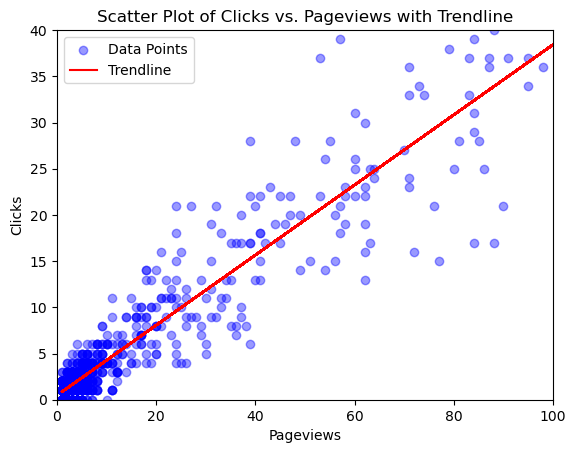

In [24]:
from sklearn.linear_model import LinearRegression

# Scatter plot
plt.scatter(ctr_data['pageview_count'], ctr_data['click_count'], color='blue', label='Data Points', alpha= 0.4)

# Fit a linear regression model
X = ctr_data['pageview_count'].values.reshape(-1, 1)  # Reshape for sklearn
y = ctr_data['click_count'].values
model = LinearRegression()
model.fit(X, y)

# Plot the trendline
trendline = model.predict(X)
plt.plot(ctr_data['pageview_count'], trendline, color='red', label='Trendline')

# Set axis limits to zoom in
plt.xlim(0, 100)
plt.ylim(0, 40)

# Labels and title
plt.xlabel('Pageviews')
plt.ylabel('Clicks')
plt.title('Scatter Plot of Clicks vs. Pageviews with Trendline')
plt.legend()

# Show the plot
plt.show()

In [25]:
ctr_data['click_count'].describe()

count    3837.000000
mean       14.524368
std       178.183502
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max      9692.000000
Name: click_count, dtype: float64

Text(0.5, 1.0, 'Distribution of Clicks Counts')

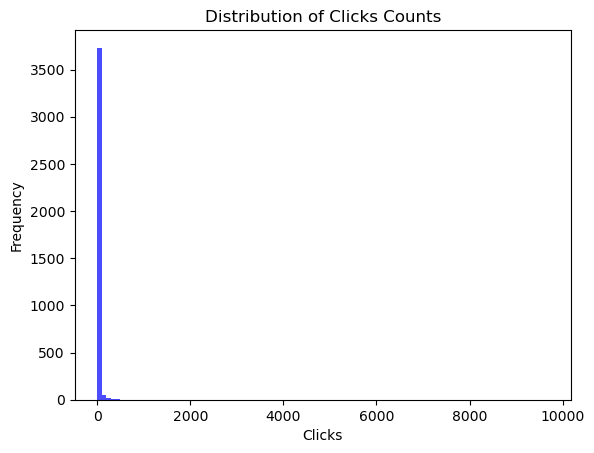

In [26]:
plt.hist(ctr_data['click_count'], bins=100, color='blue', alpha=0.7, label='Clicks')
plt.xlabel('Clicks')
plt.ylabel('Frequency')
plt.title('Distribution of Clicks Counts')

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Create a binary variable (1 if clicks > 1, else 0)
ctr_data['click_binary'] = (ctr_data['click_count'] > 1).astype(int)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(ctr_data['pageview_count'], ctr_data['click_binary'], test_size=0.2, random_state=42)

# Reshape X_train and X_test to be 2D arrays
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

# Logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Predictions and accuracy
y_pred = logistic_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy}")

Logistic Regression Accuracy: 0.9088541666666666
